<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PadLAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#anomaly detection using k means clustering


In [ ]:
#generating the data to detect anomaly 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
data=np.array([[1,1],[2,2],[2,3],[8,7],[8,9],[7,9],[7,7],[12,10],[25,24],[24,24],[25,20],[20,25],[25,25]])

In [ ]:
data

array([[ 1,  1],
       [ 2,  2],
       [ 2,  3],
       [ 8,  7],
       [ 8,  9],
       [ 7,  9],
       [ 7,  7],
       [12, 10],
       [25, 24],
       [24, 24],
       [25, 20],
       [20, 25],
       [25, 25]])

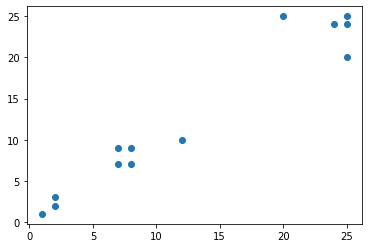

In [ ]:
plt.scatter(data[:,0],data[:,1])

In [ ]:
#k-means model with k=3
km = KMeans(n_clusters=3) 
clusters=km.fit_predict(data)

In [ ]:
clusters=km.predict(data)


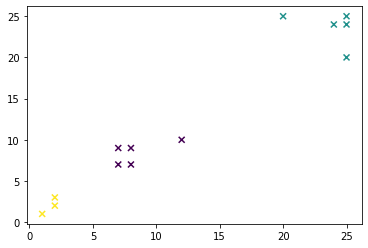

In [ ]:
plt.scatter(*zip(*data),c=clusters,marker='x')

In [ ]:
#obtain the centers of the clusters 
centroid=km.cluster_centers_

In [ ]:
centroid

array([[ 8.4       ,  8.4       ],
       [23.8       , 23.6       ],
       [ 1.66666667,  2.        ]])

In [ ]:
#initialise a array which will be used to reach the index
points = np.empty((0,len(data[0])),float)

In [ ]:
points.shape

(0, 2)

In [ ]:
#initialize an array which will be used to calculate outlier distance 
distances=np.empty((0,len(data[0])),float)

In [ ]:
distances.shape

(0, 2)

In [ ]:
for i, center_elem in enumerate(centroid):
  distances=np.append(distances,cdist([center_elem],data[clusters==i],'euclidean'))
  points=np.append(points,data[clusters==i],axis=0)

In [ ]:
distances

array([1.45602198, 0.72111026, 1.52315462, 1.97989899, 3.93954312,
       1.26491106, 0.4472136 , 3.79473319, 4.04969135, 1.84390889,
       1.20185043, 0.33333333, 1.05409255])

In [ ]:
points

array([[ 8.,  7.],
       [ 8.,  9.],
       [ 7.,  9.],
       [ 7.,  7.],
       [12., 10.],
       [25., 24.],
       [24., 24.],
       [25., 20.],
       [20., 25.],
       [25., 25.],
       [ 1.,  1.],
       [ 2.,  2.],
       [ 2.,  3.]])

In [ ]:
threshold =80

In [ ]:
outliers=points[np.where(distances>np.percentile(distances,threshold))]

In [ ]:
outliers

array([[12., 10.],
       [25., 20.],
       [20., 25.]])

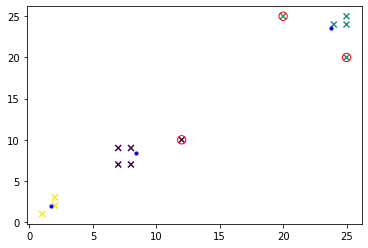

In [ ]:
plt.scatter(*zip(*data),c=clusters,marker='x')
plt.scatter(*zip(*outliers),marker='o',facecolor='None',edgecolors='r',s=70)
plt.scatter(*zip(*centroid),marker='o',facecolor='b',edgecolors='b',s=10)

In [ ]:
#similarly w k=1
km = KMeans(n_clusters=1) 
clusters=km.fit_predict(data)

In [ ]:
clusters=km.predict(data)

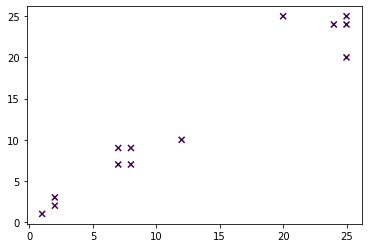

In [ ]:
plt.scatter(*zip(*data),c=clusters,marker='x')

In [ ]:
#obtain the centers of the clusters 
centroid=km.cluster_centers_

In [ ]:
#initialise a array which will be used to reach the index
points = np.empty((0,len(data[0])),float)

In [ ]:
#initialize an array which will be used to calculate outlier distance 
distances=np.empty((0,len(data[0])),float)

In [ ]:
for i, center_elem in enumerate(centroid):
  distances=np.append(distances,cdist([center_elem],data[clusters==i],'euclidean'))
  points=np.append(points,data[clusters==i],axis=0)

In [ ]:
outliers=points[np.where(distances>np.percentile(distances,threshold))]

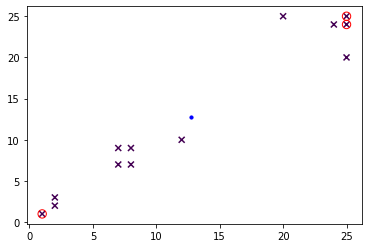

In [ ]:
plt.scatter(*zip(*data),c=clusters,marker='x')
plt.scatter(*zip(*outliers),marker='o',facecolor='None',edgecolors='r',s=70)
plt.scatter(*zip(*centroid),marker='o',facecolor='b',edgecolors='b',s=10)

In [1]:
#part B : kmeans clustering on randomly generated regression data 

In [3]:
from sklearn.cluster import KMeans
from numpy import sqrt, array,random,argsort
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [4]:
#generating the data 
random.seed(121)
def makeData(N):
  x=[]
  for i in range(N):
    a=i/1000 + random.uniform(-3,2)
    r=random.uniform(-5,10)
    if(r>=9.9):
      r+=10
    elif(r<(-4.8)):
      r-=10
    x.append([a+r])
  return array(x)

In [5]:
x=makeData(600)

In [8]:
x.shape

(600, 1)

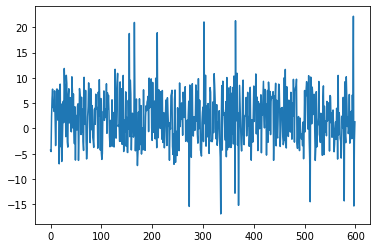

In [11]:
plt.plot(x)

In [12]:
#scale the data 
x=scale(x)


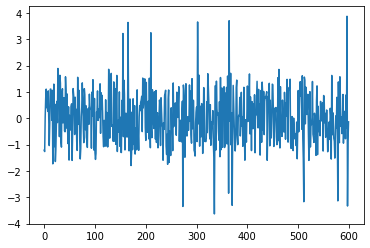

In [13]:
plt.plot(x) #the data has been scaled and standardized as you can see from the range

In [14]:
kmeans=KMeans(n_clusters=1).fit(x)

In [16]:
#determine the centroid of the data cluster
center=kmeans.cluster_centers_

In [17]:
center

array([[-1.19811568e-17]])

In [18]:
#determine the distance of the point from the center of the clustr
distance=sqrt((x-center)**2)

In [19]:
#sorting the distance 
order_index=argsort(distance,axis=0)
indexes=order_index[-5:]#5points w max distance from the center
values=x[indexes]

In [20]:
values

array([[[-3.63432676]],

       [[ 3.64141157]],

       [[ 3.65996024]],

       [[ 3.70682974]],

       [[ 3.87702328]]])

In [21]:
indexes

array([[335],
       [165],
       [302],
       [364],
       [596]])

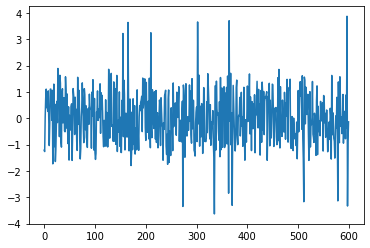

In [22]:
plt.plot(x)

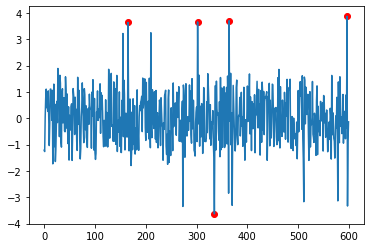

In [23]:
plt.plot(x)
plt.scatter(indexes,values,color='r')

In [24]:
#PART C :applying it on boston housing dataset 
from sklearn.datasets import load_boston


In [25]:
boston=load_boston()
y=boston.target
y=y.reshape(y.shape[0],1)
y=scale(y)


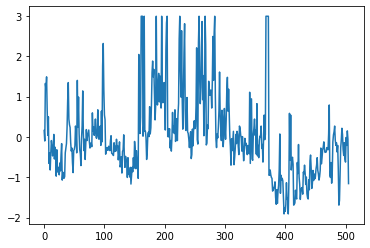

In [26]:
y_ax=range(y.shape[0])
plt.plot(y)

In [27]:
kmeans=KMeans(n_clusters=1).fit(y)

In [28]:
#determine the centroid of the data cluster
center=kmeans.cluster_centers_

In [33]:
#determine the distance of the point from the center of the clustr
distance=sqrt((y-center)**2)

In [38]:
#sorting the distance 
order_index=argsort(distance,axis=0)
indexes=order_index[-8:]#5points w max distance from the center
values=y[indexes]

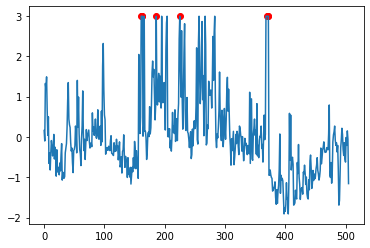

In [39]:
plt.plot(y)
plt.scatter(indexes,values,color='r')